# Starter Notebook

This notebook accompanies the Zindi Animal Insights Challenge. We load the data, look at a few trends, bring in some of the additional data provided and give a few hints about what makes a good submission. 

Hopefully this is enough to get your creative juices flowing!

# Loading the Data

### Make sure the files are accessible. Here I copy them from my google drive and import some useful libraries.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import psycopg2
import geopandas as gpd

In [2]:
#Load the postgis layers where need be

#Postgis Layer
con = psycopg2.connect(host="localhost", database="vulcan", port="6666", user="tebogo", password="tebogo")
countries_sql = "SELECT * FROM public.countries"
countries = gpd.GeoDataFrame.from_postgis(countries_sql, con, geom_col='geom')

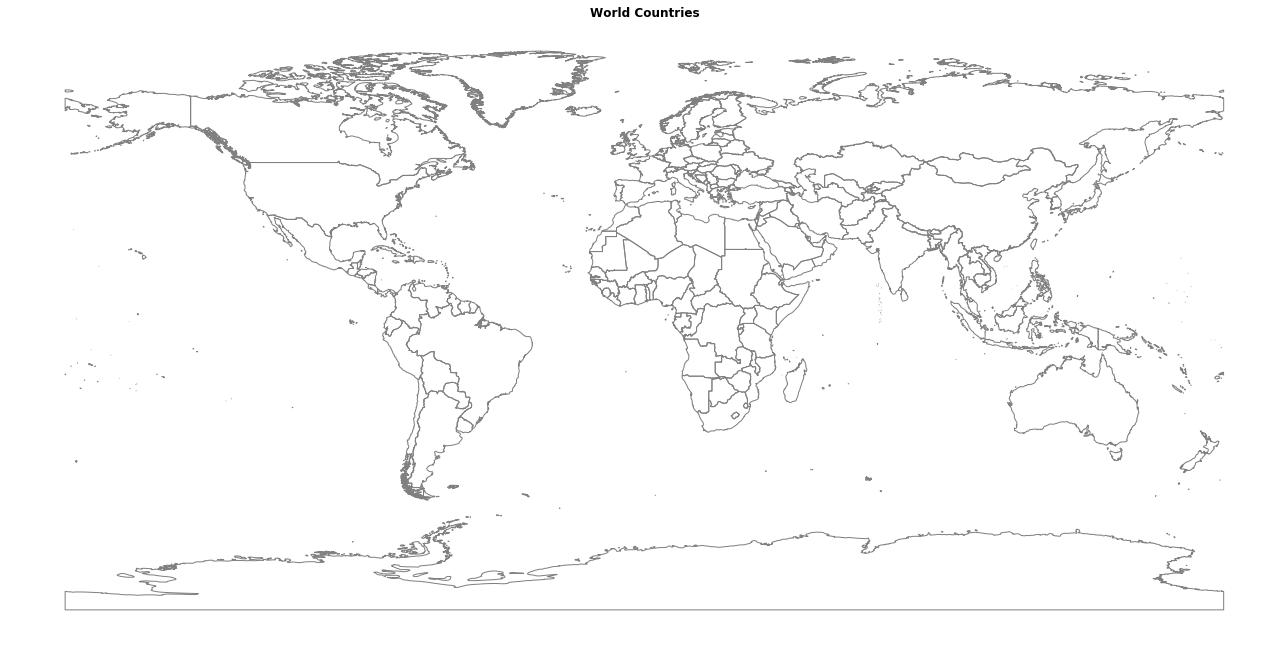

In [3]:
# Test Postgis Layer
ax = countries.plot(edgecolor = 'grey', facecolor = 'none', figsize = (18, 12), legend=True)
#roads.plot(ax=ax, color = 'purple')
#ax.set(xlim=(15, 35), ylim=(-37.5, -20))
ax.set_axis_off()
plt.title(label = 'World Countries', fontweight = 'bold')
plt.tight_layout()

In [4]:
!ls *.csv # Check the local files are present

game_counts.csv  PARK_Additional_Data.csv  ROI_Additional_Data.csv


In [5]:
#If needed, assign local table(s) to variable(s)
game_count = pd.read_csv("./game_counts.csv")

### Reading in the game counts

In [6]:
df = game_count
df.head()

,Year,Day,Time,Elephant,Buffalo,Eland,Zebra,Waterbuck,Kudu,Impala,Nyala,Bushbuck,Wild dog,Lion,Leopard,Hyena,Jackal,Warthog,Baboon
0,1995,Saturday,am,155,381,179,460,234,66,3005,0,3,10,4,0,30.0,12,154,831.0
1,1995,Saturday,pm,211,634,209,416,248,105,2345,0,2,0,4,0,5.0,4,190,455.0
2,1995,Sunday,am,159,465,136,426,238,62,2376,0,3,30,3,0,14.0,6,112,500.0
3,1995,Sunday,pm,173,304,171,581,242,140,2131,0,2,0,7,0,3.0,2,138,397.0
4,1996,Saturday,am,210,376,173,273,350,54,4099,0,0,21,1,0,2.0,0,87,NaN


### Looking at a particular species

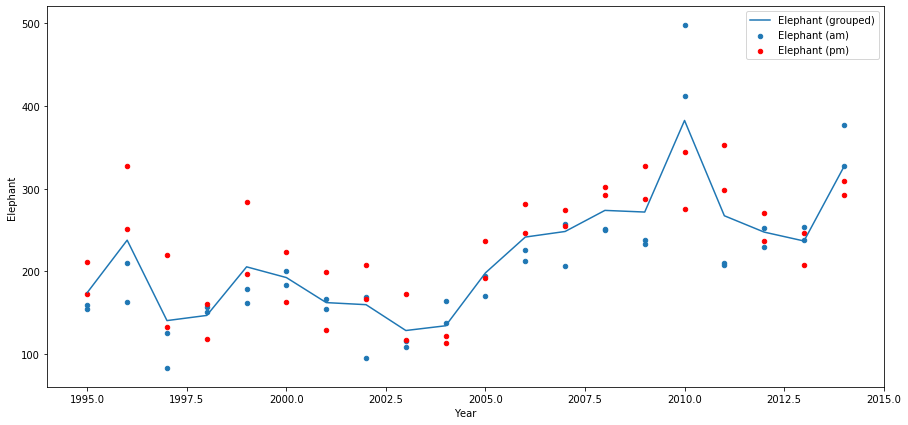

In [7]:
def plot(animal):
  """ Look at the yearly trend, showing morning observations in blue, 
  afternoon observations in red and an overall trend line. """

  # Trend
  ax = df.groupby('Year').mean().reset_index().plot(kind='line', y=animal, x='Year', label=animal+' (grouped)')

  df.loc[df.Time=='am'].plot(y=animal, x='Year', 
                                    label=animal+' (am)', 
                                    figsize=(15, 7), 
                                    ax=ax,
                                    kind='scatter')

  df.loc[df.Time=='pm'].plot(y=animal, x='Year', 
                               label=animal+' (pm)',
                               kind='scatter', 
                               ax=ax, 
                               c='red')
    
plot('Elephant')

It seems elephants are seen more in the afternoon. Does this hold true for other species?

In [8]:
# Try plotting 'Impala' and compare.

In [9]:
### If you want to explore this further, here's a way to quickly look at morning vs evening for all species
# grouped = df.groupby('Time').mean()[df.columns[3:]].T # Mean counts morning and evening
# grouped.plot.bar(color=list('rbg')+['0.75'], rot=0, figsize=(18,8)) # Compare counts - this generates the plot
# (grouped['am']/grouped['pm']).sort_values() # Just look at ratios

### Bringing in some additional data

In [10]:
# Load the floodplain-specific data
roi_df = pd.read_csv('ROI_Additional_Data.csv', parse_dates=['date'])
roi_df.head()

,date,aet,def,pdsi,pet,pr,ro,soil,srad,swe,tmmn,tmmx,vap,vpd,vs,NDVI,EVI,water
0,1994-01-01,1271.115655,0.000000,-176.444517,1271.115655,225.103465,11.018715,1146.696161,1967.839371,0,218.973337,313.538669,2543.985543,107.698692,179.439579,0.0,0.0,0.000000
1,1994-02-01,1179.904839,8.187955,-219.803671,1188.027883,124.614565,6.019286,1150.920719,2091.790276,0,211.425720,314.195116,2556.945691,101.277126,200.117931,0.0,0.0,0.620240
2,1994-03-01,543.708830,1072.130230,-328.451039,1615.981008,20.136859,1.000000,798.663319,2699.379822,0,200.084897,341.478933,2524.916770,134.850740,179.715429,0.0,0.0,0.000000
3,1994-04-01,371.896460,1089.503726,-396.650850,1461.404089,20.160835,1.000000,619.774164,2372.632383,0,184.954262,335.683922,2128.735675,155.116642,233.469610,0.0,0.0,1.125518
4,1994-05-01,110.845571,1145.726506,-446.846716,1256.321931,0.000000,0.000000,509.156497,2164.113713,0,149.225519,317.370164,1703.777281,150.488028,192.711932,0.0,0.0,0.000000


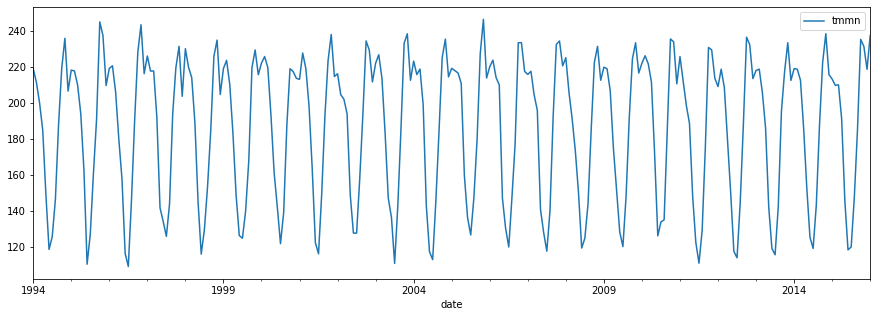

In [11]:
# Plot max temperature over time
roi_df.plot(x='date', y='tmmn', figsize=(15, 5))

In [12]:
# Add a precipitation column to our main dataframe
roi_df['Year'] = roi_df['date'].dt.year
df = pd.merge(df, roi_df.groupby('Year').sum()['pr'].reset_index(), on='Year', how='left')
df.head()

,Year,Day,Time,Elephant,Buffalo,Eland,Zebra,Waterbuck,Kudu,Impala,Nyala,Bushbuck,Wild dog,Lion,Leopard,Hyena,Jackal,Warthog,Baboon,pr
0,1995,Saturday,am,155,381,179,460,234,66,3005,0,3,10,4,0,30.0,12,154,831.0,455.288945
1,1995,Saturday,pm,211,634,209,416,248,105,2345,0,2,0,4,0,5.0,4,190,455.0,455.288945
2,1995,Sunday,am,159,465,136,426,238,62,2376,0,3,30,3,0,14.0,6,112,500.0,455.288945
3,1995,Sunday,pm,173,304,171,581,242,140,2131,0,2,0,7,0,3.0,2,138,397.0,455.288945
4,1996,Saturday,am,210,376,173,273,350,54,4099,0,0,21,1,0,2.0,0,87,NaN,791.062272


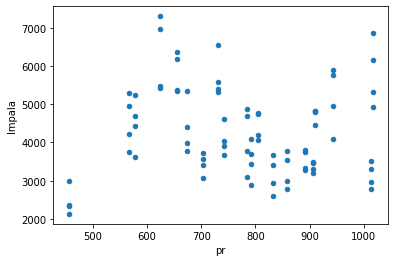

In [13]:
# And plot the relationship between annual rainfall and Impala sightings:
df.plot(x='pr', y='Impala', kind='scatter')

# Turning this into a submission

The above scatter plot is a start, but how would we incorporate it in a submission? Here are some things it needs:
- Better axis labels 
- A title
- Is this trying to show a trend/relationship? Then it needs a trend line!
- Perhaps an explanation of the relationship (correlation ceoefficient, is it linear, any outliers...)
- What's our hypothesis? Showing the trend is nice, but what does it mean? For example: "In years with more rainfall, animals can find water and food all over the park, reducing the density in the floodplain where the counts occur. So we expect to see fewer grazing animals like Impala in years with hgh precipitation. The data supports this theory, with a strong negative correlation between precipitation and impala sightings...." 
- Why did we choose yearly precipitation? Why Impala? Some justification for choices made will take an entry to the next level.